# Calculate CESM Indeces

This file grabs the monthly CESM indeces, and calculates the averages for the time periods of interest (aka the warm season), as set in the _indexDefitionions file

You need to run 'calculateCesmMonthlyIndeces.ipnyb' first

Theres a few examples of output at the bottom to sanity check this is meaningful

In [1]:
#import my functions
import utils._modelDefinitions as _model
import utils._indexDefinitions as _index
from utils.timePeriod import averageForTimePeriod

In [2]:
import xarray
import matplotlib.pyplot as plt

The indeces for each month have already been calculated. So loading up the saves versions, and putting them into a dict of pandas arrays.

In [3]:
timePIndeces=dict()

for experiment in _model.cesmAll:
    print(experiment)
    indeces = xarray.load_dataset('results/cesmMonthlyIndeces/' + experiment + '.nc')

    timePIndeces[experiment] = averageForTimePeriod(indeces)



0850cntl.001
LME.002
LME.003
LME.008
LME.009
001
002
003
004
005
006
007
008
009
010
011
012
013


To make this all easier to deal with, convert the result into an xarray and add some extra relevant information as attributes.

This allows for filtering by index, year or experiment 

In [4]:
# so i've just written the results into a dict of pandas array. This is kinda funky because I can't slice one index across multiple models
# instead, put the whole thing into an xarray with a dimension for the experiment
results=xarray.concat(
    [
        xarray.DataArray(timePIndeces[experiment], 
                         dims=['year','index'], 
                         coords={
                             'year':timePIndeces[experiment].index,
                             'index':timePIndeces[experiment].columns,
                             'experiment': experiment})
    for experiment in _model.cesmAll 
    ],
    dim='experiment'
)

results.assign_attrs(indeces.attrs)
results.assign_attrs(_index.monthsOfInterest)



<xarray.DataArray (experiment: 18, year: 1250, index: 8)>
array([[[            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        ...,
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan]],

       [[ 3.01711120e-01,  5.80139368e-01,  6.71507610e-01, ...,
         -2.57837724e-01,  7.01607426e-01,  9.33860004e-01],
        [-5.56077496e-01, -4.51839016e-01, -4.15286670e-01, ...,
         -1.11577054e+00,  1.36418933e+00, -3.65367085e-01],
        [-5.37046340e-01, -7.16594066e-01, -7.17262032e-01, ...,
          2.84160566e-01, -3.47069277e-01, -3.30354720e-01],
...
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan]],

       [[ 8.67832917e-01,  1.28704391e+00,  1.42808931e+00, ...,
         -4.10280224e-01,  7.30880479e-01, -1.15346539e+00],
        [-6.04374514e-01, -5.48852089e-01, -4.66575539e-01, ...,
         -7.54866456e-01,  1.10856635e+00, -2.21948075e+00],
        [-6.70742730e-01, -7.45286545e-01, -6.39751557e-01, ...,
          3.44666030e-01, -2.39764043e-01, -1.15738630e+00],
        ...,
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan]]])
Coordinates:
  * year        (year) int64 850 851 852 853 854 ... 2095 2096 2097 2098 2099
  * index       (index) object 'nino12' 'nino3' 'nino34' ... 'dmi' 'sam'
  * experiment  (experiment) object '0850cntl.001' 'LME.002' ... '012' '013'
Attributes:
    nino12:   [7, 15]
    nino3:    [7, 15]
    nino34:   [7, 15]
    nino4:    [7, 15]
    westIO:   [7, 12]
    eastIO:   [7, 12]
    dmi:      [7, 15]
    sam:      [10, 15]

Save the result for use later

In [5]:
results.to_netcdf('results/cesmTradIndeces.nc')

Some sanity checks to see if it looks ok:


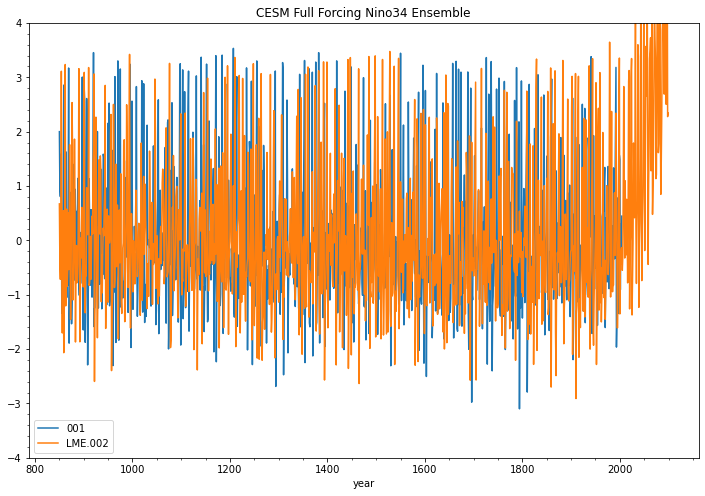

In [6]:
# plotSomething
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)

results.sel(experiment='001', index='nino34').plot(label='001')
results.sel(experiment='LME.002', index='nino34').plot(label='LME.002')

#Tidy up a bit
plt.title("CESM Full Forcing Nino34 Ensemble")
plt.ylim(-4,4)
plt.minorticks_on()
plt.legend()

In [7]:
# A multi-experiment mean?

mean = results.sel(index='nino34').mean(dim='experiment')
std = results.sel(index='nino34').std(dim='experiment')

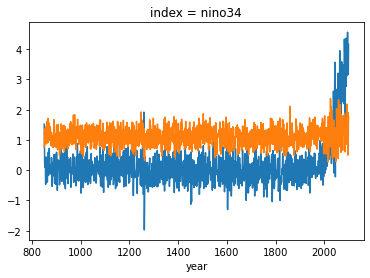

In [8]:
plt.figure()
mean.plot()
std.plot()

In [9]:
# why limit yourself to one index?

mean = results.sel(experiment=_model.cesmFullForcings).mean(dim='experiment')
std = results.sel(experiment=_model.cesmFullForcings).std(dim='experiment')

In [10]:
std

<xarray.DataArray (year: 1250, index: 8)>
array([[0.63879447, 0.80194228, 0.80547884, ..., 0.71686059, 0.74043432,
        1.29706324],
       [1.24857915, 1.51250175, 1.29366894, ..., 0.68717694, 0.70412551,
        1.57521114],
       [0.76191157, 1.21564891, 1.30835677, ..., 0.81647238, 0.83557333,
        1.40376101],
       ...,
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan]])
Coordinates:
  * year     (year) int64 850 851 852 853 854 855 ... 2095 2096 2097 2098 2099
  * index    (index) object 'nino12' 'nino3' 'nino34' ... 'eastIO' 'dmi' 'sam'